<a href="https://colab.research.google.com/github/gauravpks/ml-repo/blob/master/Part%204%20-%20Clustering/K-Means%20Clustering/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

##Intutition

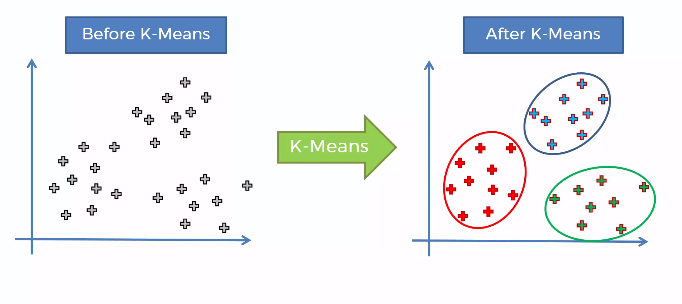

STEP BY STEP Approach

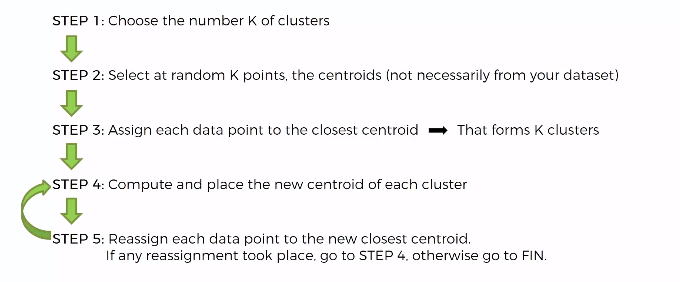

Can we classify the cluster? even with 2 variables

Assuming 2 clusters..

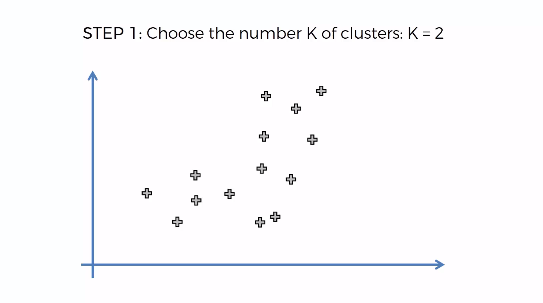

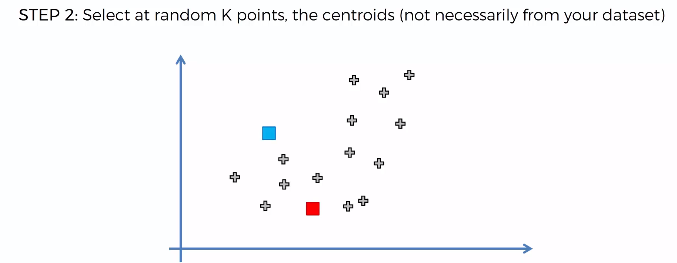

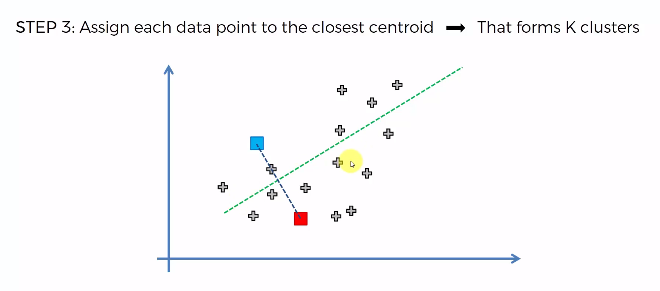

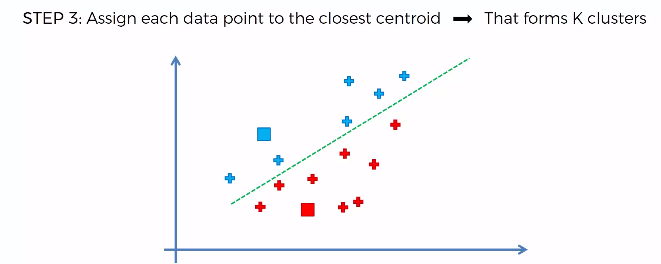

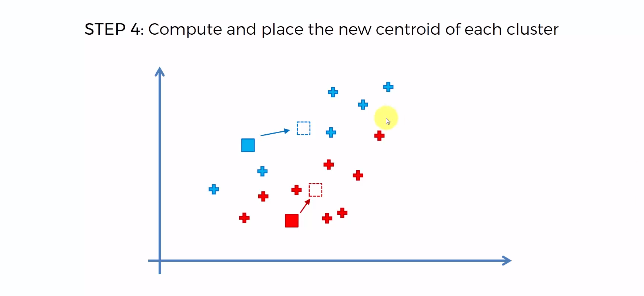

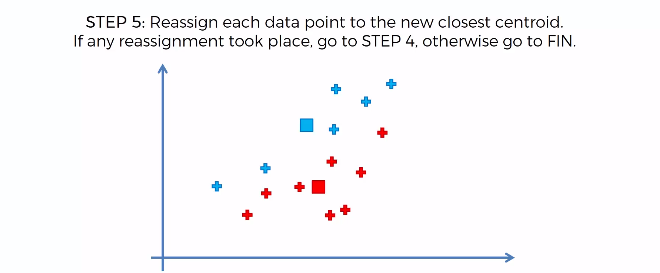

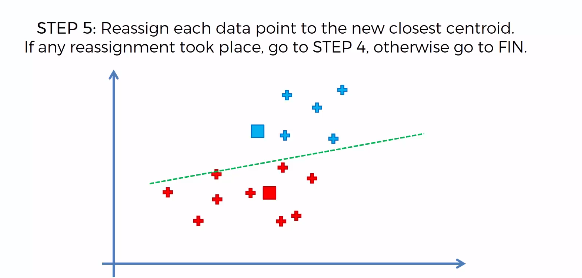

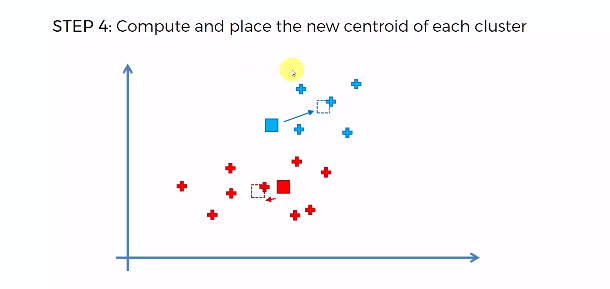

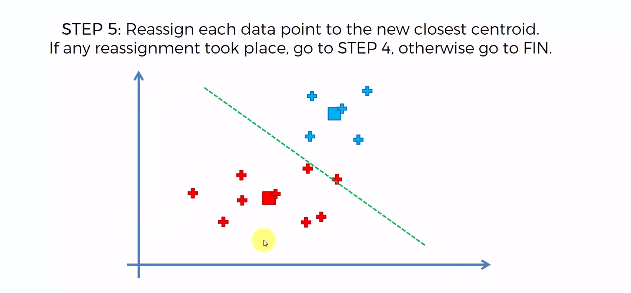

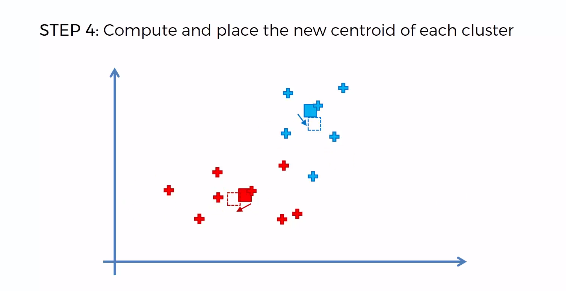

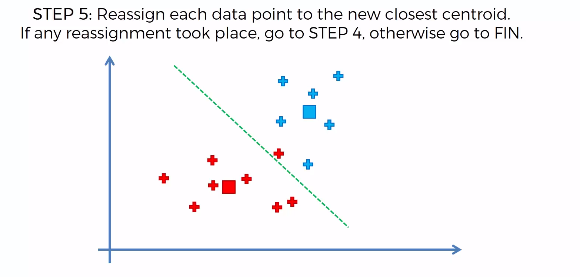

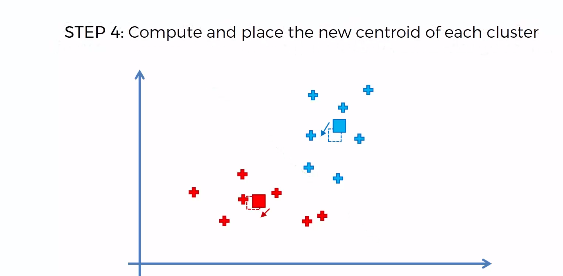

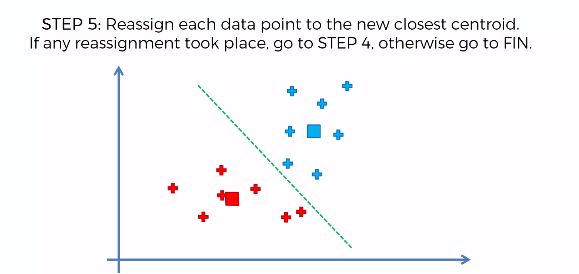

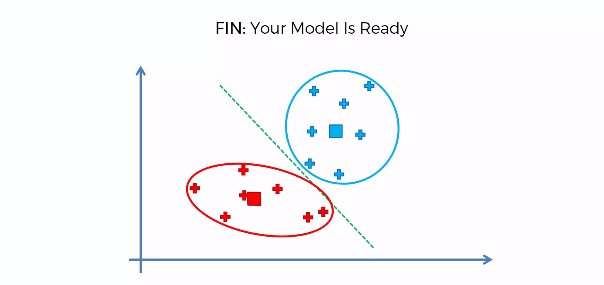

**Random Initilization Trap**

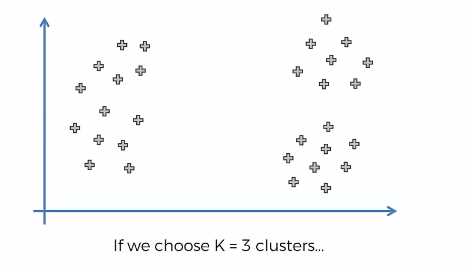

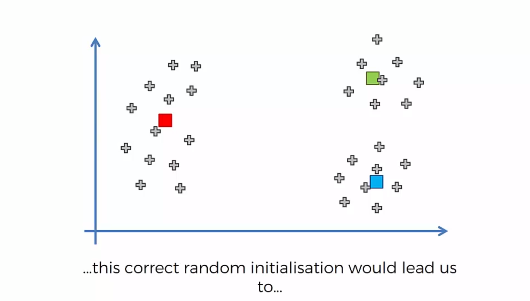

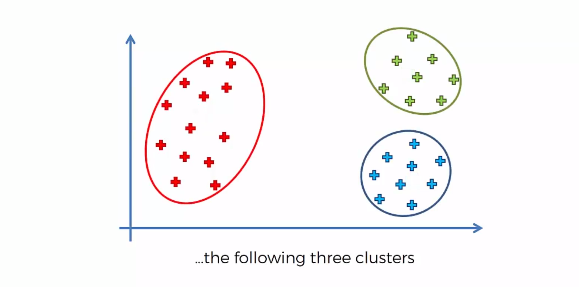

**What happens with a bad Random Inilization?**

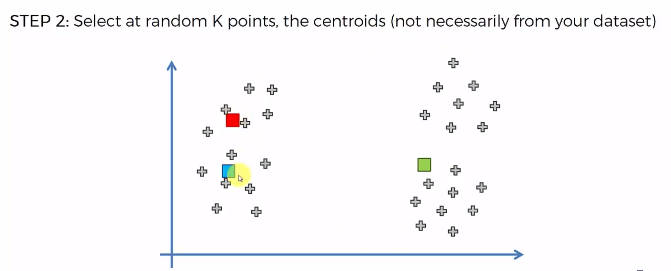

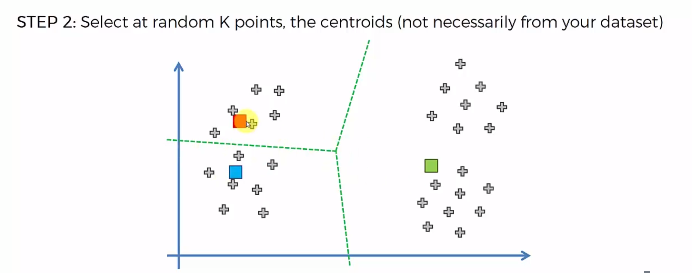

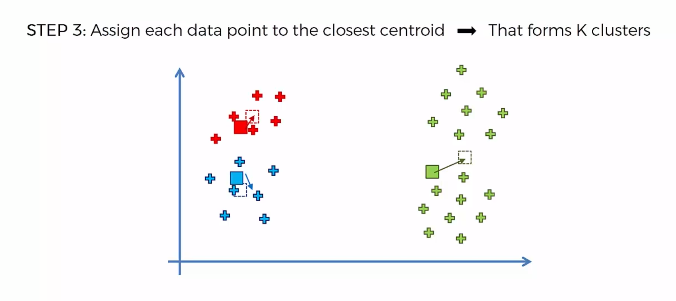

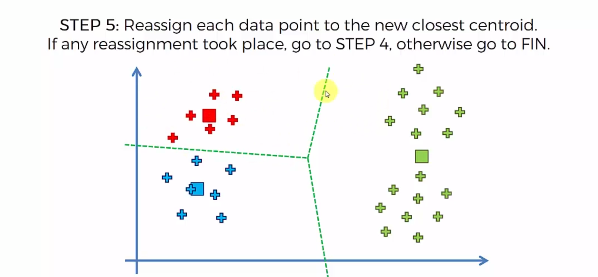

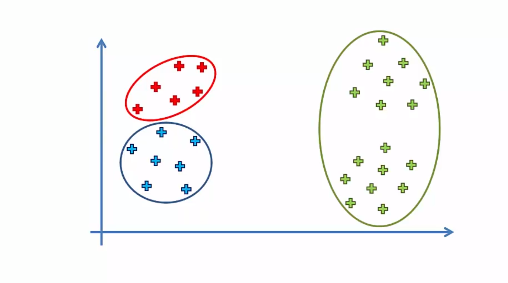

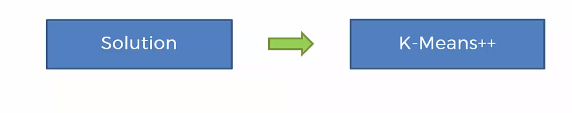

The exact algorithm is as follows:

1. Choose one center uniformly at random among the data points.
2. For each data point x not chosen yet, compute D(x), the distance between x and the nearest center that has already been chosen.
3. Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
4. Repeat Steps 2 and 3 until k centers have been chosen.
Now that the initial centers have been chosen, proceed using standard** k-means clustering**.

By following the above procedure for initialization, we pick up centroids that are far away from one another. This increases the chances of initially picking up centroids that lie in different clusters. Also, since centroids are picked up from the data points, each centroid has some data points associated with it at the end.

**Choosing the write number of Clusters??**

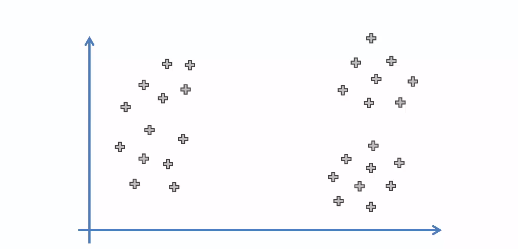

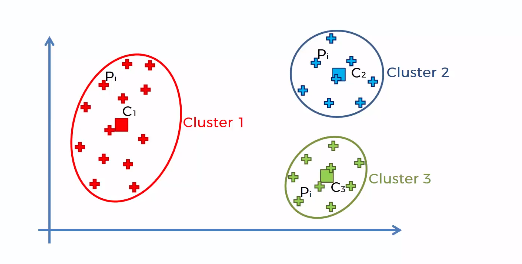

How many clusters would have been better??

With K =3

**Within Cluster Sum of Squared** ... a metrics

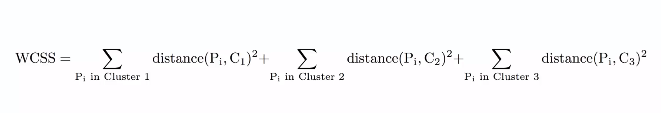

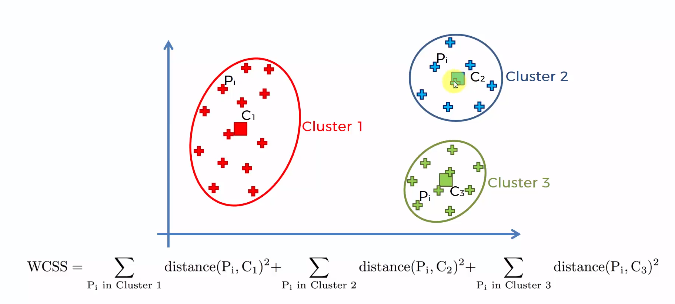

With 1 Cluster

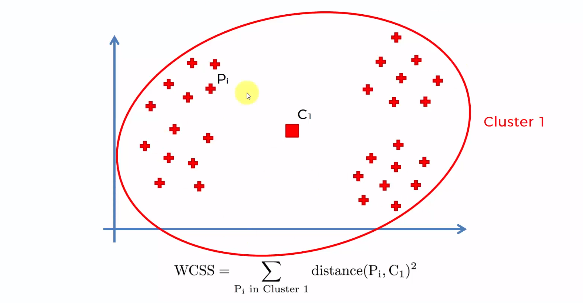

With 2 Cluster

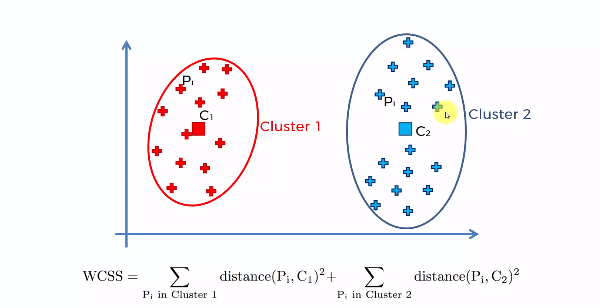

With 3 Clusters

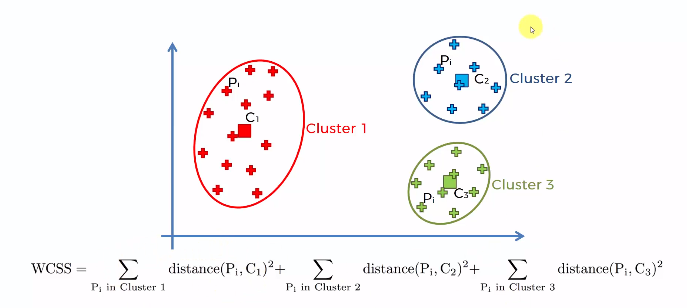

Higher the number of cluster.. better the fit.. and WCSS reduces.. But what is optimal??

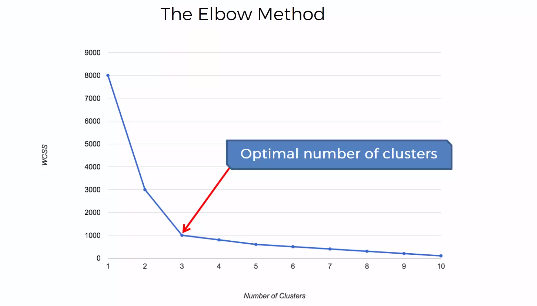

## Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [22]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gauravpks/ml-repo/master/Part%204%20-%20Clustering/K-Means%20Clustering/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

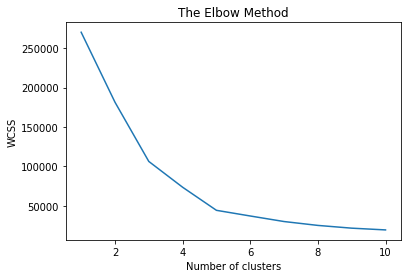

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

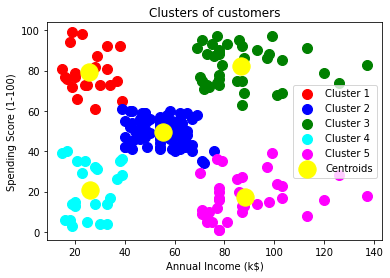

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()